# Polish Wordnet - prepare KEPLER knowledge graph

In [1]:
import pandas as pd

from src.settings import SENTIMENT_RES_DIR

PLWN_DIR = SENTIMENT_RES_DIR.joinpath('plwordnet')

## Data - triplets

### Synset relation types

In [2]:
df_syn_relations = pd.read_csv(PLWN_DIR.joinpath('syn_rel.csv'), sep='\t')
df_syn_relations.head()

,parent_id,child_id,reltype
0,12,5840,hiperonimia
1,12,5841,hiperonimia
2,12,5842,hiperonimia
3,12,5843,hiperonimia
4,12,19116,hiperonimia


In [3]:
df_syn_relations.reltype.unique()

array(['hiperonimia', 'fuzzynimia_synsetów',
       'subiekt_przy_niewyrażonym_predykacie', 'gradacyjność',
       'hiponimia', 'bliskoznaczność', 'część', 'hczęść_plWN-PWN',
       'element_kolekcji', 'mczęść_plWN-PWN',
       'międzyjęzykowa_synonimia_częściowa_plWN-PWN',
       'miejsce_przy_niewyrażonym_predykacie', 'Syn_plWN-PWN',
       'melement_plWN-PWN', 'Hiper_plWN-PWN', 'wartość_cechy',
       'egzemplarz', 'subiekt_N-V', 'określnik', 'materiał',
       'presupozycja_z_tożsamością_podmiotu', 'kauzacja',
       'holonimia_czasownikowa', 'Hipo_plWN-PWN', 'meronimia_podsytuacji',
       'Location_Goal', 'Location_Source', 'Path', 'Theme', 'Instrument',
       'Initiator', 'mmateriał_plWN-PWN', 'inchoatywność',
       'meronimia_czasownikowa', 'cecha_definicyjna', 'miejsce',
       'element_taksonomiczny', 'Typ_plWN-PWN', 'typ', 'subiekt_V-N',
       'helement_plWN-PWN', 'obszar',
       'uprzedniość_bez_tożsamości_podmiotu', 'porcja', 'okoliczność',
       'międzyjęzykowa_synon

In [4]:
df_syn_relations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407477 entries, 0 to 407476
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   parent_id  407477 non-null  int64 
 1   child_id   407477 non-null  int64 
 2   reltype    407477 non-null  object
dtypes: int64(2), object(1)
memory usage: 9.3+ MB


### plWN - PWN mappings by relation

In [5]:
df_plwn_pwn_mapping = pd.read_csv(
    SENTIMENT_RES_DIR.joinpath('plwn_pwn_mappings', 'mapping_plwn_i-links_i-all.txt'),
    sep='\t',
)
df_plwn_pwn_mapping.head()

,parent_id,child_id,name
0,100081,356680,Hiper_plWN-PWN
1,100090,323934,Hiper_plWN-PWN
2,100091,284855,Hiper_plWN-PWN
3,100094,359501,Hiper_plWN-PWN
4,100107,290303,Hiper_plWN-PWN


In [6]:
df_plwn_pwn_mapping.name.unique()

array(['Hiper_plWN-PWN', 'Hiper_PWN-plWN', 'Hipo_plWN-PWN',
       'Hipo_PWN-plWN', 'międzyjęzykowa_synonimia_częściowa_plWN-PWN',
       'międzyjęzykowa_synonimia_częściowa_PWN-plWN',
       'międzyjęzykowa_synonimia_międzyparadygmatyczna_made_of_plWN-PWN',
       'międzyjęzykowa_synonimia_międzyparadygmatyczna_resembling_plWN-PWN',
       'Syn_plWN-PWN', 'Syn_PWN-plWN'], dtype=object)

In [7]:
from collections import defaultdict

SYN_RELTYPES_PLWN_PWN = [
    'międzyjęzykowa_synonimia_częściowa_plWN-PWN',
    'międzyjęzykowa_synonimia_częściowa_PWN-plWN',
    'Syn_plWN-PWN',
    'Syn_PWN-plWN'
]

plwn_pl_en_map_dict = defaultdict(set)

for idx, row in df_plwn_pwn_mapping.iterrows():
    relation_name = row['name']

    # synonyms
    if relation_name in [
        'Syn_plWN-PWN',
        'międzyjęzykowa_synonimia_częściowa_plWN-PWN',
        'międzyjęzykowa_synonimia_międzyparadygmatyczna_made_of_plWN-PWN'
    ]:
        plwn_pl_parent_id = str(row['parent_id'])
        plwn_en_child_id = str(row['child_id'])
        plwn_pl_en_map_dict[plwn_pl_parent_id].add(plwn_en_child_id)

    if relation_name in [
        'Syn_PWN-plWN',
        'międzyjęzykowa_synonimia_częściowa_PWN-plWN',
        'międzyjęzykowa_synonimia_międzyparadygmatyczna_made_of_PWN-plWN'
    ]:
        plwn_en_parent_id = str(row['parent_id'])
        plwn_pl_child_id = str(row['child_id'])

        plwn_pl_en_map_dict[plwn_pl_child_id].add(plwn_en_parent_id)

In [8]:
plwn_pl_en_map_dict

defaultdict(set,
            {'10004': {'272107'},
             '10006': {'273103'},
             '10008': {'279506'},
             '100090': {'285932'},
             '100137': {'323882'},
             '100138': {'323874'},
             '100144': {'321151'},
             '10016': {'272374'},
             '100182': {'321477'},
             '100195': {'323868'},
             '100197': {'323896'},
             '100254': {'316814'},
             '100263': {'290583'},
             '100275': {'325148'},
             '100286': {'318656'},
             '100287': {'288605'},
             '100297': {'288605'},
             '100318': {'285279'},
             '100320': {'287524'},
             '100354': {'362461'},
             '100357': {'288034'},
             '100358': {'289126'},
             '1004': {'355895'},
             '100451': {'291016'},
             '100461': {'291291'},
             '100478': {'358714'},
             '100514': {'366811'},
             '100570': {'290246'},
         

In [9]:
len(plwn_pl_en_map_dict)

54219

### Synsets which appeared in datasets

In [10]:
import json
from tqdm.auto import tqdm
from src.settings import DATA_DIR

GOEMO_WSD_DIR = DATA_DIR.joinpath('goemotions', 'wsd_amuse_EN')
IMDB_WSD_DIR = DATA_DIR.joinpath('imdb', 'wsd_amuse_EN')
MR_WSD_DIR = DATA_DIR.joinpath('movie_reviews', 'wsd_amuse_EN')
ST_WSD_DIR = DATA_DIR.joinpath('stanford_treebank', 'wsd_amuse_EN')
KLEJ_AR_WSD_DIR = DATA_DIR.joinpath('klej_ar', 'wsd_amuse_PL')
POLEMO_WSD_DIR = DATA_DIR.joinpath('polemo2', 'wsd_amuse_PL')

datasets_dirs = [
    GOEMO_WSD_DIR,
    IMDB_WSD_DIR,
    MR_WSD_DIR,
    ST_WSD_DIR,
    KLEJ_AR_WSD_DIR,
    POLEMO_WSD_DIR,
]

splits = ['train', 'dev', 'test']
PLWN_EN_SENSE_IDS = set()

for dataset_dir in datasets_dirs:
    print(f'Dataset: {dataset_dir.parent.stem}')
    for split in splits:
        if dataset_dir.parent.stem == 'polemo2':
            json_path = dataset_dir.joinpath(f'all_text.{split}.amuse_wsd.json')
        else:
            json_path = dataset_dir.joinpath(f'{split}.amuse_wsd.json')

        with json_path.open(mode='r') as f:
            data = json.load(f)

        for sample_id in tqdm(
            data.keys(),
            desc="Getting plWN sense ids appeared in datasets...",
            total=len(data.keys()),
        ):
            sample_data = data[sample_id]
            tokens = sample_data['tokens']

            for token in tokens:
                if 'plwnSynsetId' in token:
                    plwn_en_id = token['plwnSynsetId']
                    if plwn_en_id != "O":
                        PLWN_EN_SENSE_IDS.add(int(plwn_en_id))

Dataset: goemotions


Getting plWN sense ids appeared in datasets...:   0%|          | 0/43410 [00:00<?, ?it/s]

Getting plWN sense ids appeared in datasets...:   0%|          | 0/5426 [00:00<?, ?it/s]

Getting plWN sense ids appeared in datasets...:   0%|          | 0/5427 [00:00<?, ?it/s]

Dataset: imdb


Getting plWN sense ids appeared in datasets...:   0%|          | 0/22500 [00:00<?, ?it/s]

Getting plWN sense ids appeared in datasets...:   0%|          | 0/2500 [00:00<?, ?it/s]

Getting plWN sense ids appeared in datasets...:   0%|          | 0/25000 [00:00<?, ?it/s]

Dataset: movie_reviews


Getting plWN sense ids appeared in datasets...:   0%|          | 0/8534 [00:00<?, ?it/s]

Getting plWN sense ids appeared in datasets...:   0%|          | 0/1078 [00:00<?, ?it/s]

Getting plWN sense ids appeared in datasets...:   0%|          | 0/1050 [00:00<?, ?it/s]

Dataset: stanford_treebank


Getting plWN sense ids appeared in datasets...:   0%|          | 0/8544 [00:00<?, ?it/s]

Getting plWN sense ids appeared in datasets...:   0%|          | 0/1101 [00:00<?, ?it/s]

Getting plWN sense ids appeared in datasets...:   0%|          | 0/2210 [00:00<?, ?it/s]

Dataset: klej_ar


Getting plWN sense ids appeared in datasets...:   0%|          | 0/9180 [00:00<?, ?it/s]

Getting plWN sense ids appeared in datasets...:   0%|          | 0/977 [00:00<?, ?it/s]

Getting plWN sense ids appeared in datasets...:   0%|          | 0/992 [00:00<?, ?it/s]

Dataset: polemo2


Getting plWN sense ids appeared in datasets...:   0%|          | 0/6573 [00:00<?, ?it/s]

Getting plWN sense ids appeared in datasets...:   0%|          | 0/823 [00:00<?, ?it/s]

Getting plWN sense ids appeared in datasets...:   0%|          | 0/820 [00:00<?, ?it/s]

In [11]:
PLWN_EN_SENSE_IDS

{262989,
 262990,
 262992,
 262997,
 262998,
 263002,
 263003,
 263005,
 263007,
 263008,
 263009,
 263010,
 263011,
 263012,
 263013,
 263014,
 263015,
 263016,
 263017,
 263019,
 263022,
 263034,
 263035,
 263036,
 263038,
 263039,
 263040,
 263042,
 263044,
 263045,
 263046,
 263047,
 263048,
 263049,
 263050,
 263052,
 263053,
 263054,
 263055,
 263056,
 263058,
 263059,
 263060,
 263062,
 263064,
 263065,
 263066,
 263067,
 263068,
 263069,
 263070,
 263072,
 263076,
 263077,
 263078,
 263079,
 263081,
 263082,
 263083,
 263085,
 263087,
 263088,
 263091,
 263092,
 263095,
 263096,
 263097,
 263099,
 263100,
 263101,
 263102,
 263103,
 263104,
 263109,
 263110,
 263112,
 263116,
 263121,
 263122,
 263124,
 263126,
 263128,
 263129,
 263130,
 263132,
 263133,
 263135,
 263136,
 263137,
 263138,
 263139,
 263144,
 263146,
 263147,
 263149,
 263151,
 263152,
 263154,
 263156,
 263157,
 263158,
 263161,
 263162,
 263163,
 263164,
 263165,
 263166,
 263168,
 263170,
 263172,
 263173,
 

In [12]:
print(f'All plWN ids in datasets num: {len(PLWN_EN_SENSE_IDS)}')

All plWN ids in datasets num: 49854


### Filter to those polish synsets which are able to map to pl-PWN ids and are in datasets ids

In [13]:
from tqdm.auto import tqdm
from itertools import product

mapped_parents_list = []
mapped_childs_list = []
mapped_reltypes_list = []

for idx, row in tqdm(df_syn_relations.iterrows(), total=len(df_syn_relations)):
    parent = str(row['parent_id'])
    child = str(row['child_id'])
    reltype = row['reltype']

    if 'plWN-PWN' in reltype or 'PWN-plWN' in reltype:
        continue

    # check mapping existence
    if parent in plwn_pl_en_map_dict and child in plwn_pl_en_map_dict:
        mapped_parents = plwn_pl_en_map_dict[parent]
        mapped_childs = plwn_pl_en_map_dict[child]

        pairs = product(mapped_parents, mapped_childs)
        for parent_id, child_id in pairs:
            # check existence in datasets
            if int(parent_id) in PLWN_EN_SENSE_IDS and int(child_id) in PLWN_EN_SENSE_IDS:
                mapped_parents_list.append(parent_id)
                mapped_childs_list.append(child_id)
                mapped_reltypes_list.append(reltype)

df_syn_rel_mapped = pd.DataFrame({
    'parent_id': mapped_parents_list,
    'child_id': mapped_childs_list,
    'reltype': mapped_reltypes_list,
})

  0%|          | 0/407477 [00:00<?, ?it/s]

In [14]:
df_syn_rel_mapped.to_csv('syn_rel_mapped_en.csv', sep='\t', index=False)

In [15]:
df_syn_rel_mapped

,parent_id,child_id,reltype
0,337482,340564,hiperonimia
1,337482,340311,hiperonimia
2,337482,338388,fuzzynimia_synsetów
3,337482,340272,fuzzynimia_synsetów
4,337482,342069,fuzzynimia_synsetów
...,...,...,...
29723,289643,346877,hiponimia
29724,289995,284832,hiponimia
29725,359474,325354,hiponimia
29726,360998,285398,fuzzynimia_synsetów


filter `hiperonimia` and `hiponimia` as symmetric relation

In [16]:
symmetric_relations_occur = set()

parents_list = []
childs_list = []
reltypes_list = []
for idx, row in tqdm(df_syn_rel_mapped.iterrows(), total=len(df_syn_rel_mapped)):
    parent = int(row['parent_id'])
    child = int(row['child_id'])
    reltype = row['reltype']

    if reltype == 'hiperonimia' or reltype == 'hiponimia':
        pair = tuple(sorted([parent, child]))
        if pair in symmetric_relations_occur:
            continue
        else:
            symmetric_relations_occur.add(pair)

    parents_list.append(parent)
    childs_list.append(child)
    reltypes_list.append(reltype)

df_syn_rel_mapped_filtered = pd.DataFrame({
    'parent_id': parents_list,
    'child_id': childs_list,
    'reltype': reltypes_list,
})

  0%|          | 0/29728 [00:00<?, ?it/s]

In [17]:
df_syn_rel_mapped_filtered

,parent_id,child_id,reltype
0,337482,340564,hiperonimia
1,337482,340311,hiperonimia
2,337482,338388,fuzzynimia_synsetów
3,337482,340272,fuzzynimia_synsetów
4,337482,342069,fuzzynimia_synsetów
...,...,...,...
22151,327798,326934,materiał
22152,301904,269301,cecha_definicyjna
22153,343414,264020,cecha_definicyjna
22154,313544,313548,hiperonimia


In [18]:
reltype_counts = df_syn_rel_mapped_filtered.reltype.value_counts()

top_reltypes = reltype_counts[reltype_counts > 100]
CHOSEN_RELTYPES = top_reltypes.index.values.tolist()

CHOSEN_RELTYPES

['hiperonimia',
 'hiponimia',
 'część',
 'fuzzynimia_synsetów',
 'wartość_cechy',
 'element_kolekcji',
 'materiał',
 'typ',
 'określnik',
 'bliskoznaczność',
 'egzemplarz',
 'miejsce',
 'kauzacja']

In [19]:
df_syn_rel_mapped_filtered = df_syn_rel_mapped_filtered[df_syn_rel_mapped_filtered['reltype'].isin(CHOSEN_RELTYPES)]

df_syn_rel_mapped_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21124 entries, 0 to 22155
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   parent_id  21124 non-null  int64 
 1   child_id   21124 non-null  int64 
 2   reltype    21124 non-null  object
dtypes: int64(2), object(1)
memory usage: 660.1+ KB


In [20]:
from src.settings import KEPLER_KE_DIR

df_syn_rel_mapped_filtered.to_csv(KEPLER_KE_DIR.joinpath('triplets.csv'), sep='\t', index=False)

## Data - definitions, usage example, emo examples

In [21]:
df_lu_comments = pd.read_csv(PLWN_DIR.joinpath('lu_comments.csv'), sep='\t')
df_lu_comments.head()

,lu_id,comment
0,100000,##D: członek szczepu zamieszkującego w staroży...
1,100001,"##D: błona fotograficzna, jeden z podstawowych..."
2,100009,##D: Cephaelis ipecacuanha - gatunek rośliny n...
3,100009,##P: Wymiotnica lekarska jest rośliną wiecznie...
4,10000,##A1: Liczy się dla nich wolność wyznania i po...


In [22]:
df_lu_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378735 entries, 0 to 378734
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   lu_id    378735 non-null  int64 
 1   comment  378735 non-null  object
dtypes: int64(1), object(1)
memory usage: 5.8+ MB


In [23]:
df_syn_lu = pd.read_csv(PLWN_DIR.joinpath('lex_syn_id_mapper.csv'), sep='\t')
df_syn_lu.head()

,lex_id,syn_id
0,399,9107
1,4339,442239
2,659668,425000
3,21195,10
4,144142,103562


In [24]:
df_syn_lu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512571 entries, 0 to 512570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   lex_id  512571 non-null  int64
 1   syn_id  512571 non-null  int64
dtypes: int64(2)
memory usage: 7.8 MB


### Concat sense with LUs

In [25]:
df_merged = df_lu_comments.merge(df_syn_lu, left_on='lu_id', right_on='lex_id')
df_merged = df_merged.sort_values(by=['lu_id']).reset_index()
df_merged

,index,lu_id,comment,lex_id,syn_id
0,11912,11,##P: Armia jest zabawką w rękach władcy absolu...,11,238698
1,11911,11,##P: Aby zaprowadzić rządy absolutne i despoty...,11,238698
2,11910,11,"##D: absolutystyczny, oparty na zasadach, idei...",11,238698
3,11913,11,##P: Armia jest zabawką w rękach władcy absolu...,11,238698
4,11914,11,##W: Różnica między monarchią absolutną a desp...,11,238698
...,...,...,...,...,...
378730,328120,7088245,"##P: Ściskał palce wokół drążka, aż mu knykcie...",7088245,68457
378731,328121,7088245,"##P: Ściskał szczęki tak mocno, że myśleliśmy,...",7088245,68457
378732,328118,7088245,"##D: zaciskać, zmniejszać odległość pomiędzy e...",7088245,68457
378733,328119,7088245,##P: Powoli ściska ramiona szczypiec.,7088245,68457


### Map to EN-plWN ids and filter to those in datasets

In [26]:
en_plwn_ids_list = []
select_indices = []

for idx, row in tqdm(df_merged.iterrows(), total=len(df_merged)):
    plwn_pl_id = str(row['syn_id'])

    if plwn_pl_id in plwn_pl_en_map_dict:
        plwn_en_ids = [int(x) for x in list(plwn_pl_en_map_dict[plwn_pl_id])]
        en_plwn_ids_list.append(plwn_en_ids)
        select_indices.append(idx)

df_merged_mapped = df_merged.iloc[select_indices]
df_merged_mapped['en_syn_id'] = en_plwn_ids_list
df_merged_mapped

  0%|          | 0/378735 [00:00<?, ?it/s]

/tmp/ipykernel_26430/1673374431.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_mapped['en_syn_id'] = en_plwn_ids_list


,index,lu_id,comment,lex_id,syn_id,en_syn_id
0,11912,11,##P: Armia jest zabawką w rękach władcy absolu...,11,238698,[266981]
1,11911,11,##P: Aby zaprowadzić rządy absolutne i despoty...,11,238698,[266981]
2,11910,11,"##D: absolutystyczny, oparty na zasadach, idei...",11,238698,[266981]
3,11913,11,##P: Armia jest zabawką w rękach władcy absolu...,11,238698,[266981]
4,11914,11,##W: Różnica między monarchią absolutną a desp...,11,238698,[266981]
...,...,...,...,...,...,...
378646,328019,7088201,##P: Już mi się brzydzi feminizm.,7088201,66872,[375998]
378647,328020,7088202,"##D: emocja, którą odczuwa się w stosunku do k...",7088202,7087689,[359474]
378648,328021,7088202,"##P: Czuję do ciebie przyjaźń, ale nic więcej.",7088202,7087689,[359474]
378662,328042,7088214,"##D: mały ślad po namiętnym pocałunku, siniacz...",7088214,7087711,[360998]


In [27]:
df_merged_mapped = df_merged_mapped.explode(column='en_syn_id', ignore_index=True)

df_merged_mapped

,index,lu_id,comment,lex_id,syn_id,en_syn_id
0,11912,11,##P: Armia jest zabawką w rękach władcy absolu...,11,238698,266981
1,11911,11,##P: Aby zaprowadzić rządy absolutne i despoty...,11,238698,266981
2,11910,11,"##D: absolutystyczny, oparty na zasadach, idei...",11,238698,266981
3,11913,11,##P: Armia jest zabawką w rękach władcy absolu...,11,238698,266981
4,11914,11,##W: Różnica między monarchią absolutną a desp...,11,238698,266981
...,...,...,...,...,...,...
106338,328019,7088201,##P: Już mi się brzydzi feminizm.,7088201,66872,375998
106339,328020,7088202,"##D: emocja, którą odczuwa się w stosunku do k...",7088202,7087689,359474
106340,328021,7088202,"##P: Czuję do ciebie przyjaźń, ale nic więcej.",7088202,7087689,359474
106341,328042,7088214,"##D: mały ślad po namiętnym pocałunku, siniacz...",7088214,7087711,360998


In [28]:
# filter to sense in datasets
select_indices_datasets = []
for idx, row in tqdm(df_merged_mapped.iterrows(), total=len(df_merged_mapped)):
    plwn_en_id = int(row['en_syn_id'])

    if plwn_en_id in PLWN_EN_SENSE_IDS:
        select_indices_datasets.append(idx)

df_merged_mapped_filtered = df_merged_mapped.iloc[select_indices_datasets]
df_merged_mapped_filtered

  0%|          | 0/106343 [00:00<?, ?it/s]

,index,lu_id,comment,lex_id,syn_id,en_syn_id
0,11912,11,##P: Armia jest zabawką w rękach władcy absolu...,11,238698,266981
1,11911,11,##P: Aby zaprowadzić rządy absolutne i despoty...,11,238698,266981
2,11910,11,"##D: absolutystyczny, oparty na zasadach, idei...",11,238698,266981
3,11913,11,##P: Armia jest zabawką w rękach władcy absolu...,11,238698,266981
4,11914,11,##W: Różnica między monarchią absolutną a desp...,11,238698,266981
...,...,...,...,...,...,...
106336,327984,7088187,"##D: stan, w którym coś trwa.",7088187,7087666,289995
106339,328020,7088202,"##D: emocja, którą odczuwa się w stosunku do k...",7088202,7087689,359474
106340,328021,7088202,"##P: Czuję do ciebie przyjaźń, ale nic więcej.",7088202,7087689,359474
106341,328042,7088214,"##D: mały ślad po namiętnym pocałunku, siniacz...",7088214,7087711,360998


In [29]:
df_merged_mapped_filtered.sort_values(by=['en_syn_id'])

,index,lu_id,comment,lex_id,syn_id,en_syn_id
15282,26286,19431,"##D: taki, który jest doskonały, ostateczny, n...",19431,9681,263010
15283,26287,19431,##W: Absolutna prawda jest całkowicie poza zas...,19431,9681,263010
64371,67602,368720,##P: Po nałożeniu tego kremu twoja skóra stani...,368720,237006,263017
64370,67601,368720,"##D: taki, który jest w stanie chłonąć, wchłan...",368720,237006,263017
89831,215817,685513,"##D: taki, który łatwo wchłania ciecz; chłonny.",685513,237006,263017
...,...,...,...,...,...,...
50610,370666,90237,"##D: sprawiać, że coś płonie i ubywa.",90237,7066275,380777
40171,118899,54841,##D: inna nazwa koloru pik w kartach.,54841,14313,423424
21855,38312,26534,"##D: jeden z czterech kolorów w kartach, oznac...",26534,14313,423424
54146,6131,106828,"##D: substancja chemiczna, której zadaniem jes...",106828,77295,427724


In [30]:
def get_comment_and_type(comment: str) -> tuple[str, str]:
    if '##D' in comment:
        return comment.split('##D: ')[-1], 'def'
    if '##W' in comment:
        return comment.split('##D: ')[-1], 'wiki'
    if '##P' in comment:
        return comment.split('##P: ')[-1], 'example'
    if '##A1' in comment:
        return comment.split('##A1: ')[-1], 'emo_example'
    if '##A2' in comment:
        return comment.split('##A2: ')[-1], 'emo_example'

df_applied = df_merged_mapped_filtered.apply(
    lambda x: get_comment_and_type(x['comment']),
    axis='columns',
    result_type='expand'
)
df_merged_mapped_filtered = pd.concat([df_merged_mapped_filtered, df_applied], axis='columns')
df_merged_mapped_filtered = df_merged_mapped_filtered.rename(columns={
    0: 'comment_cleaned',
    1: 'comment_type',
})

In [31]:
df_merged_mapped_filtered

,index,lu_id,comment,lex_id,syn_id,en_syn_id,comment_cleaned,comment_type
0,11912,11,##P: Armia jest zabawką w rękach władcy absolu...,11,238698,266981,Armia jest zabawką w rękach władcy absolutnego.,example
1,11911,11,##P: Aby zaprowadzić rządy absolutne i despoty...,11,238698,266981,Aby zaprowadzić rządy absolutne i despotyczne ...,example
2,11910,11,"##D: absolutystyczny, oparty na zasadach, idei...",11,238698,266981,"absolutystyczny, oparty na zasadach, idei abso...",def
3,11913,11,##P: Armia jest zabawką w rękach władcy absolu...,11,238698,266981,Armia jest zabawką w rękach władcy absolutnego.,example
4,11914,11,##W: Różnica między monarchią absolutną a desp...,11,238698,266981,##W: Różnica między monarchią absolutną a desp...,wiki
...,...,...,...,...,...,...,...,...
106336,327984,7088187,"##D: stan, w którym coś trwa.",7088187,7087666,289995,"stan, w którym coś trwa.",def
106339,328020,7088202,"##D: emocja, którą odczuwa się w stosunku do k...",7088202,7087689,359474,"emocja, którą odczuwa się w stosunku do kogoś ...",def
106340,328021,7088202,"##P: Czuję do ciebie przyjaźń, ale nic więcej.",7088202,7087689,359474,"Czuję do ciebie przyjaźń, ale nic więcej.",example
106341,328042,7088214,"##D: mały ślad po namiętnym pocałunku, siniacz...",7088214,7087711,360998,"mały ślad po namiętnym pocałunku, siniaczek za...",def


In [32]:
group_synset = df_merged_mapped_filtered.groupby(by=['en_syn_id']).agg({
    'lu_id': ['nunique'],
    'comment': ['count'],
})

group_synset

,lu_id,comment
,nunique,count
en_syn_id,,
263010,1,2
263017,2,3
263034,1,2
263040,1,3
263044,2,2
...,...,...
380745,5,15
380759,1,3


In [33]:
group_synset.describe()

,lu_id,comment
,nunique,count
count,17756.000000,17756.00000
mean,1.706803,3.99189
std,1.259503,4.12705
min,1.000000,1.00000
25%,1.000000,2.00000
50%,1.000000,3.00000
75%,2.000000,5.00000
max,25.000000,52.00000


In [34]:
group_synset_comment_types = df_merged_mapped_filtered.groupby(by=['en_syn_id', 'comment_type']).agg({
    'lu_id': ['nunique'],
    'comment_type': ['count'],
})
group_synset_comment_types

lu_id comment_type
                       nunique        count
en_syn_id comment_type                     
263010    def                1            1
          wiki               1            1
263017    def                2            2
          example            1            1
263034    def                1            1
...                        ...          ...
380759    example            1            2
380777    def                1            1
          example            1            1
423424    def                2            2
427724    def                2            2

[34038 rows x 2 columns]

In [35]:
plwn_en_senses = []
comments_concatenated = []
comment_types = ['emo_example', 'def']

group_synset = df_merged_mapped_filtered.groupby(by=['en_syn_id'])

for name, group in group_synset:
    plwn_en_senses.append(str(name))

    emo_examples = []
    definitions = []
    for idx, row in group.iterrows():
        comment_type = row['comment_type']
        if comment_type == 'def':
            definitions.append(row['comment_cleaned'])
        if comment_type == 'emo_example':
            emo_examples.append(row['comment_cleaned'])

    emo_part = ' '.join(emo_examples)
    def_part = ' '.join(definitions)
    comment_concat = f'{emo_part} {def_part}'
    comments_concatenated.append(comment_concat)

df_sense_prepared = pd.DataFrame({
    'plwn_id': plwn_en_senses,
    'comment': comments_concatenated,
})

In [36]:
df_sense_prepared

,plwn_id,comment
0,263010,"taki, który jest doskonały, ostateczny, nie d..."
1,263017,"taki, który jest w stanie chłonąć, wchłaniać ..."
2,263034,"o człowieku: taki, który zachowuje ascezę."
3,263040,"Ten koleś jest niezbyt pociągający, ma wielki ..."
4,263044,"związany z pojęciem - wytworem umysłu, najważ..."
...,...,...
17751,380745,"odbijać światło, mieć połysk. błyszczeć, odbi..."
17752,380759,mieć intensywną i ciepłą barwę.
17753,380777,"sprawiać, że coś płonie i ubywa."
17754,423424,"jeden z czterech kolorów w kartach, oznaczony..."


In [37]:
df_sense_prepared.to_csv(KEPLER_KE_DIR.joinpath('plwn_senses_comments.csv'), sep='\t', index=False)

### Check sense ids compatibility with triplets

In [38]:
comments_sense_ids = set([int(x) for x in df_sense_prepared.plwn_id.unique()])
print(f'Comments sense ids len: {len(comments_sense_ids)}')

parent_ids = set(df_syn_rel_mapped_filtered.parent_id.unique())
child_ids = set(df_syn_rel_mapped_filtered.child_id.unique())

triplets_sense_ids = parent_ids.union(child_ids)
print(f'Triplet sense ids len: {len(triplets_sense_ids)}')

Comments sense ids len: 17756
Triplet sense ids len: 15220


In [39]:
triplets_sense_ids.issubset(comments_sense_ids)

False

In [40]:
triplet_diff = triplets_sense_ids.difference(comments_sense_ids)

print(f'Difference in sense ids: {len(triplet_diff)}')
triplet_diff

Difference in sense ids: 3501


{311314,
 286740,
 360469,
 286741,
 344087,
 368672,
 286752,
 311332,
 352296,
 303145,
 303146,
 360491,
 311339,
 319534,
 327727,
 360495,
 303153,
 376880,
 311344,
 286772,
 286775,
 311353,
 327738,
 360507,
 319545,
 286779,
 286781,
 327744,
 270403,
 368707,
 286787,
 286790,
 286792,
 360521,
 303177,
 360523,
 319568,
 360532,
 286805,
 303195,
 368734,
 360544,
 303203,
 319588,
 303207,
 295018,
 286829,
 286837,
 360566,
 360569,
 360572,
 303230,
 360575,
 286850,
 303235,
 286856,
 286862,
 376978,
 286871,
 286872,
 368798,
 325676,
 303272,
 368810,
 319668,
 311477,
 286905,
 377018,
 311485,
 311486,
 303301,
 303303,
 311495,
 368842,
 286923,
 286924,
 352458,
 311503,
 303313,
 368860,
 319710,
 368863,
 368866,
 368868,
 303333,
 336102,
 286956,
 377069,
 336116,
 336118,
 319734,
 336121,
 377084,
 286972,
 319743,
 286979,
 319749,
 336134,
 319750,
 319751,
 286984,
 286985,
 336140,
 336141,
 360721,
 336145,
 303379,
 360724,
 377106,
 286996,
 286997,
 

In [41]:
df_sense_prepared[df_sense_prepared.plwn_id == str(286740)]

,plwn_id,comment


In [42]:
triplet_ids_to_delete = list(triplets_sense_ids.difference(comments_sense_ids))

df_syn_rel_mapped_filtered

,parent_id,child_id,reltype
0,337482,340564,hiperonimia
1,337482,340311,hiperonimia
2,337482,338388,fuzzynimia_synsetów
3,337482,340272,fuzzynimia_synsetów
4,337482,342069,fuzzynimia_synsetów
...,...,...,...
22149,318700,318457,część
22150,318700,318455,część
22151,327798,326934,materiał
22154,313544,313548,hiperonimia


In [43]:
selected_indices_keep = []
df_syn_rel_mapped_filtered = df_syn_rel_mapped_filtered.reset_index()

for idx, row in df_syn_rel_mapped_filtered.iterrows():
    parent_id = int(row['parent_id'])
    child_id = int(row['child_id'])

    if parent_id in triplet_ids_to_delete:
        continue
    if child_id in triplet_ids_to_delete:
        continue

    selected_indices_keep.append(idx)

df_syn_rel_mapped_filtered_kept = df_syn_rel_mapped_filtered.iloc[selected_indices_keep]

In [49]:
df_syn_rel_mapped_filtered_kept = df_syn_rel_mapped_filtered_kept.drop(columns=['index'])
df_syn_rel_mapped_filtered_kept

,parent_id,child_id,reltype
11,337395,342760,hiperonimia
12,337395,341120,hiperonimia
15,337395,339743,hiponimia
16,337395,342754,hiponimia
17,337397,342740,hiperonimia
...,...,...,...
21119,318700,318457,część
21120,318700,318455,część
21121,327798,326934,materiał
21122,313544,313548,hiperonimia


In [50]:
df_syn_rel_mapped_filtered_kept.to_csv(KEPLER_KE_DIR.joinpath('triplets.csv'), sep='\t', index=False)

## Check tokenized comment lengths distribution

In [46]:
from transformers import AutoTokenizer

HUGGINGFACE_MODEL_NAME = 'allegro/herbert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(HUGGINGFACE_MODEL_NAME, do_lower_case=True)

texts = df_sense_prepared['comment'].values.tolist()

text_tokenized = tokenizer(
    texts,
    add_special_tokens=True,
    return_token_type_ids=False,
    return_attention_mask=False,
    truncation=False,
    padding=False,
    return_length=True
)
text_tokens = text_tokenized['input_ids']
lengths = text_tokenized['length']

df_sense_prepared['tok_len'] = lengths
df_sense_prepared.head()

Token indices sequence length is longer than the specified maximum sequence length for this model (743 > 512). Running this sequence through the model will result in indexing errors


,plwn_id,comment,tok_len
0,263010,"taki, który jest doskonały, ostateczny, nie d...",14
1,263017,"taki, który jest w stanie chłonąć, wchłaniać ...",35
2,263034,"o człowieku: taki, który zachowuje ascezę.",13
3,263040,"Ten koleś jest niezbyt pociągający, ma wielki ...",45
4,263044,"związany z pojęciem - wytworem umysłu, najważ...",30


In [47]:
df_sense_prepared.describe()

,tok_len
count,17756.000000
mean,46.317864
std,54.117505
min,2.000000
25%,16.000000
50%,29.000000
75%,54.000000
max,785.000000


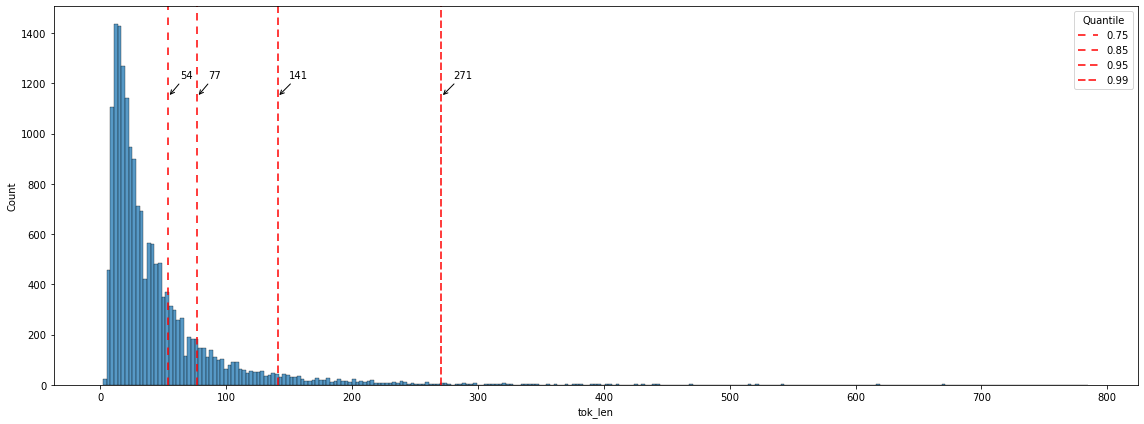

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 6))

sns.histplot(x='tok_len', data=df_sense_prepared, ax=ax)
max_val = max([p.get_height() for p in ax.patches])
for q, ls in zip([0.75, 0.85, 0.95, 0.99], [(0, (5, 5)), (0, (5, 4)), (0, (5, 3)), (0, (5, 2))]):
    qv = int(df_sense_prepared['tok_len'].quantile(q))
    ax.axvline(qv, color='red', ls=ls, lw=1.5, label=q)
    ax.annotate(
        qv,
        xy=(qv, max_val * 0.8),
        xytext=(qv + 9, max_val * 0.85),
        arrowprops=dict(arrowstyle="->", color='black'),
    )

ax.legend(title='Quantile')

fig.tight_layout()